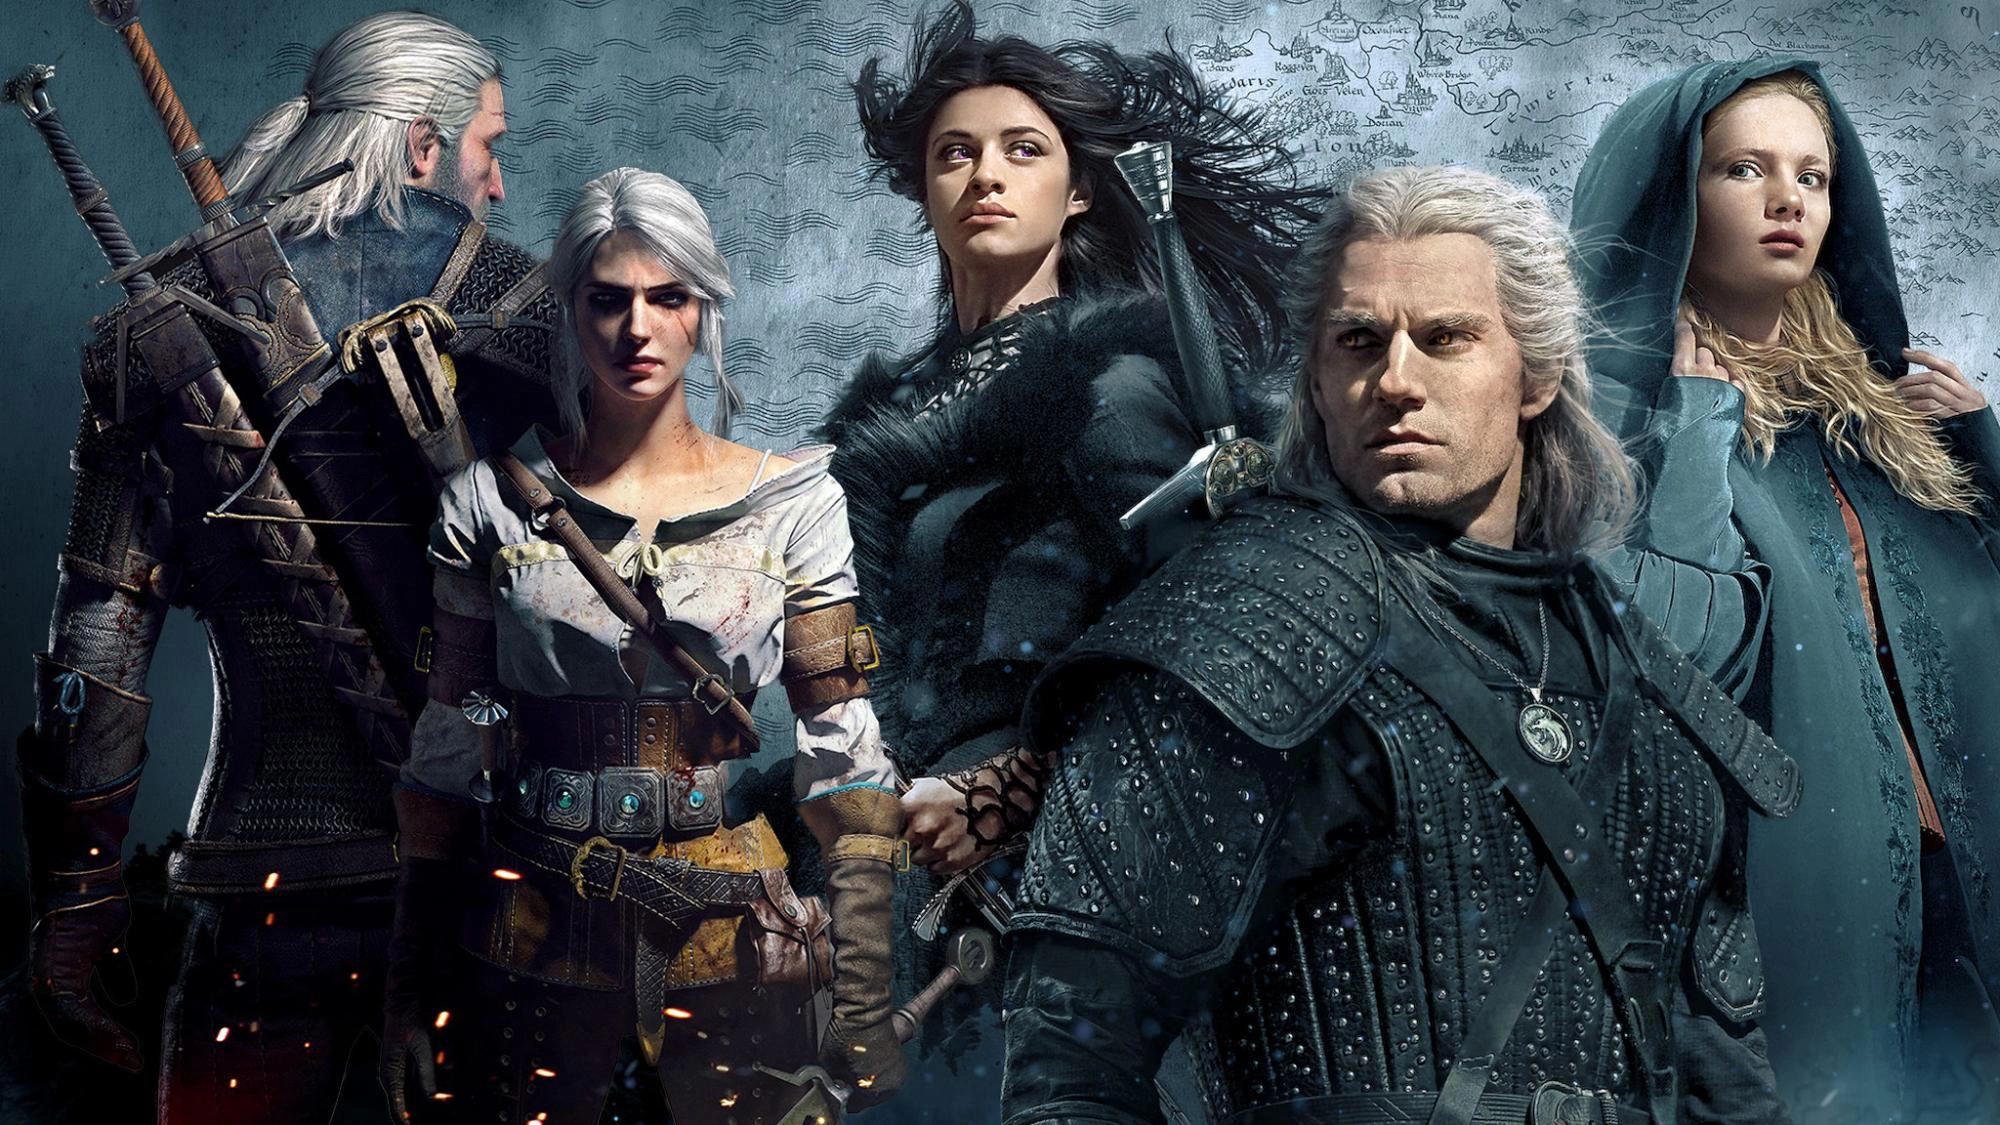

DATASET SOURCE: https://github.com/dworschak/Witcher/tree/master/RESSOURCES/_books/text
https://github.com/thu-vu92/the_witcher_network/blob/main/characters.csv

DATASET DESCRIPTION: U ovom datasetu sam izvukao tekst knjiga witcher serijala 

INTENTION: Cilj je pronaci najvaznijeg lika i lika koji se najvise spominje uz glavnog lika serijala

HYPOTHESIS: Smatram da ce biti Ciri jer je ona kljucni dio knjiga uz geralata takoder i yennifer 

PSEUDOKOD:

Primjer pseudokoda na vrlo visokoj razini, naravno mozete ga i malo razraditi:

Install the required packages.

Import necessary libraries.

Mount Google Drive and load the CSV data into a DataFrame.

Create a networkx Graph object.

Create a dictionary to store project-organization relationships. Add edges between organizations involved in the same project. Perform basic network analysis: graph size, edge density, degree distribution, and connected components. Create a random subgraph for further analysis. Visualize the subgraph. Calculate clustering coefficient, centrality measures, and community detection. Analyze communities and identify important nodes. Extract and print names of top nodes based on degree centrality. Calculate and print the diameter of the graph and the largest connected component. Calculate the number of triangles in the graph, which indicates cohesive collaboration patterns.

In [ ]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [ ]:
!python3 -m spacy download en_core_web_sm

In [ ]:
#Load spacy English languague model
NER = spacy.load("en_core_web_sm")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
 
import os
 
# Get all files in the root directory of your Google Drive
all_books = [b for b in os.scandir('/content/drive/My Drive/witcher/Tekst') if '.txt' in b.name]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Učitavanje knjiga

In [ ]:
all_books

[<DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '1 The Last Wish.txt'>]

In [ ]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [ ]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

In [ ]:
character_df = pd.read_csv('/content/drive/My Drive/witcher/characters.csv')

In [ ]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [ ]:
pd.set_option('display.max_rows', None)
character_df

book  \
0                   Category:Baptism of Fire characters   
1                   Category:Baptism of Fire characters   
2                   Category:Baptism of Fire characters   
3                   Category:Baptism of Fire characters   
4                   Category:Baptism of Fire characters   
5                   Category:Baptism of Fire characters   
6                   Category:Baptism of Fire characters   
7                   Category:Baptism of Fire characters   
8                   Category:Baptism of Fire characters   
9                   Category:Baptism of Fire characters   
10                  Category:Baptism of Fire characters   
11                  Category:Baptism of Fire characters   
12                  Category:Baptism of Fire characters   
13                  Category:Baptism of Fire characters   
14                  Category:Baptism of Fire characters   
15                  Category:Baptism of Fire characters   
16                  Category:Baptism of Fire characters   
17                  Category:Baptism of Fire characters   
18                  Category:Baptism of Fire characters   
19                  Category:Baptism of Fire characters   
20                  Category:Baptism of Fire characters   
21                  Category:Baptism of Fire characters   
22                  Category:Baptism of Fire characters   
23                  Category:Baptism of Fire characters   
24                  Category:Baptism of Fire characters   
25                  Category:Baptism of Fire characters   
26                  Category:Baptism of Fire characters   
27                  Category:Baptism of Fire characters   
28                  Category:Baptism of Fire characters   
29                  Category:Baptism of Fire characters   
30                  Category:Baptism of Fire characters   
31                  Category:Baptism of Fire characters   
32                  Category:Baptism of Fire characters   
33                  Category:Baptism of Fire characters   
34                  Category:Baptism of Fire characters   
35                  Category:Baptism of Fire characters   
36                  Category:Baptism of Fire characters   
37                  Category:Baptism of Fire characters   
38                  Category:Baptism of Fire characters   
39                  Category:Baptism of Fire characters   
40                  Category:Baptism of Fire characters   
41                  Category:Baptism of Fire characters   
42                  Category:Baptism of Fire characters   
43                  Category:Baptism of Fire characters   
44                  Category:Baptism of Fire characters   
45                  Category:Baptism of Fire characters   
46                  Category:Baptism of Fire characters   
47                  Category:Baptism of Fire characters   
48                  Category:Baptism of Fire characters   
49                  Category:Baptism of Fire characters   
50                  Category:Baptism of Fire characters   
51                  Category:Baptism of Fire characters   
52                  Category:Baptism of Fire characters   
53                  Category:Baptism of Fire characters   
54                  Category:Baptism of Fire characters   
55                  Category:Baptism of Fire characters   
56                  Category:Baptism of Fire characters   
57                  Category:Baptism of Fire characters   
58                  Category:Baptism of Fire characters   
59                  Category:Baptism of Fire characters   
60                  Category:Baptism of Fire characters   
61                  Category:Baptism of Fire characters   
62                  Category:Baptism of Fire characters   
63                  Category:Baptism of Fire characters   
64                  Category:Baptism of Fire characters   
65                  Category:Baptism of Fire characters   
66                  Category:Baptism of Fire characters   
67                  Category:Baptism of

# Imenovanje popisa entiteta po rečenici


In [ ]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [ ]:
sent_entity_df

sentence  \
0                                            (I.,  \n)   
1    (The, sun, pushed, its, fiery, tentacles, thro...   
2    (Yennefer, 's, belt, lay, on, a, high, -, heel...   
3    (One, black, stocking, hung, on, the, backrest...   
4    (The, second, stocking, and, the, second, shoe...   
5                                  (Geralt, sighed, .)   
6    (Yennefer, liked, to, undress, fast, and, elem...   
7    (He, would, have, to, start, getting, used, to...   
8                  (He, had, no, other, choice, ., \n)   
9    (He, stood, up, ,, opened, the, shutters, and,...   
10   (From, the, lake, ,, smooth, as, a, mirror, bo...   
11   (Yennefer, wriggled, under, the, blanket, with...   
12                             (Geralt, sighed, ., \n)   
13    (", It, 's, a, beautiful, day, today, ,, Yen, .)   
14                                 (", \n, ", Eeeh, ?)   
15   (What, ?, ",  \n, ", It, 's, a, beautiful, day...   
16      (An, exceptionally, beautiful, one, ., ",  \n)   
17                            (She, surprised, him, .)   
18   (Instead, of, cursing, and, hiding, her, head,...   
19   (Geralt, knew, that, the, nightgown, lay, behi...   
20                           (But, he, was, silent, .)   
21   (Yennefer, hated, that, sort, of, comment, ., ...   
22   (The, sorceress, cursed, suddenly, ,, kicked, ...   
23   (The, nightgown, flew, out, from, behind, the,...   
24                            (Geralt, sighed, .,  \n)   
25   (Yennefer, rose, ,, walked, to, him, ,, embrac...   
26                                 (Geralt, sighed, .)   
27   (The, list, of, things, he, 'd, have, to, get,...   
28            (", No, ., ",  \n, ", That, 's, good, .)   
29                                (You, know, what, ?)   
30    (Today, is, a, beautiful, day, ,, of, course, .)   
31                             (Good, work, ., ",  \n)   
32                                        (", Work, ?)   
33                    (What, do, you, mean, ?, ",  \n)   
34   (Before, Yennefer, could, answer, ,, they, hea...   
35   (On, the, lakeshore, ,, splashing, showers, of...   
36   (The, mare, was, thoroughbred, and, particular...   
37   (Geralt, knew, that, it, once, belonged, to, a...   
38   (Ciri, named, the, mare, Kelpie, ,, which, in,...   
39   (The, name, was, quite, perfect, for, the, mar...   
40   (It, 's, not, been, a, long, time, since, a, c...   
41   (The, hobbit, 's, name, was, Sandy, Frogmorton...   
42   ((, a, word, I, have, yet, to, come, up, with,...   
43   (", One, day, she, 'll, break, her, neck, ,, "...   
44   (", One, day, your, crazy, daughter, will, bre...   
45   (Geralt, turned, his, head, and, without, a, w...   
46   (", All, right, ,, then, ,, ", smiled, Yennefe...   
47   (", Sorry, ,, our, daughter, ., ",  \n, She, h...   
48   (Geralt, touched, her, hair, with, his, lips, ...   
49   (And, then, they, ended, up, again, in, the, b...   
50   (And, they, started, to, search, for, each, ot...   
51   (Knowing, that, they, would, eventually, find,...   
52   (Joy, and, happiness, was, in, everything, the...   
53   (And, even, though, they, were, so, different,...   
54   (And, it, was, like, the, first, time, ,, when...   
55   (And, just, like, the, first, time, she, wante...   
56   (Later, ,, when, he, wanted, to, tell, her, ,,...   
57   (The, world, was, slowly, returning, to, its, ...   
58   (", Yen, ?, ",  \n, ", When, you, said, that, ...   
59                  (Does, that, mean, ..., ?, ",  \n)   
60   (", It, does, ,, ", she, confirmed, and, stret...   
61   (", Look, ,, Geralt, ,, we, created, this, wea...   
62                                    (Last, night, .)   
63   (Myself, ,, Nenneke, ,, Triss, and, Dorregaray...   
64   (I, could, n't, risk, ,, this, day, must, be, ...   
65   (She, fell, silent, and, jabbed, his, side, wi...   
66   (", Why, ,, it, 's, the, most, important, day,...   
67   (The, castle, Rozrog, ,, standing, on, a, jut,...   
68   (To, put, it, mildly, ,, Rozrog, was, a

In [ ]:
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [ ]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [ ]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence                entities  \
1   (The, sun, pushed, its, fiery, tentacles, thro...              [Yennefer]   
2   (Yennefer, 's, belt, lay, on, a, high, -, heel...              [Yennefer]   
5                                 (Geralt, sighed, .)                [Geralt]   
6   (Yennefer, liked, to, undress, fast, and, elem...              [Yennefer]   
11  (Yennefer, wriggled, under, the, blanket, with...              [Yennefer]   
12                            (Geralt, sighed, ., \n)                [Geralt]   
19  (Geralt, knew, that, the, nightgown, lay, behi...  [Yennefer, last night]   
21  (Yennefer, hated, that, sort, of, comment, ., ...              [Yennefer]   
24                           (Geralt, sighed, .,  \n)                [Geralt]   
25  (Yennefer, rose, ,, walked, to, him, ,, embrac...              [Yennefer]   

   character_entities  
1          [Yennefer]  
2          [Yennefer]  
5            [Geralt]  
6          [Yennefer]  
11         [Yennefer]  
12           [Geralt]  
19         [Yennefer]  
21         [Yennefer]  
24           [Geralt]  
25         [Yennefer]

In [ ]:
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

<ipython-input-141-aafd8a541941>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [ ]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
1    (The, sun, pushed, its, fiery, tentacles, thro...   
2    (Yennefer, 's, belt, lay, on, a, high, -, heel...   
5                                  (Geralt, sighed, .)   
6    (Yennefer, liked, to, undress, fast, and, elem...   
11   (Yennefer, wriggled, under, the, blanket, with...   
..                                                 ...   
689  (", It, 's, something, we, 're, searching, for...   
695  (Around, midnight, ,, when, the, guests, were,...   
698  (Geralt, and, Yennefer, had, known, Loot, -, P...   
709  (Ah, ,, I, 'm, so, pleased, ,, Geralt, ,, and,...   
711  (Ah, ,, damn, ,, what, am, I, saying, ..., ", ...   

                                   entities  character_entities  
1                                [Yennefer]          [Yennefer]  
2                                [Yennefer]          [Yennefer]  
5                                  [Geralt]            [Geralt]  
6                                [Yennefer]          [Yennefer]  
11                               [Yennefer]          [Yennefer]  
..                                      ...                 ...  
689                               [Galahad]           [Galahad]  
695  [midnight, Yennefer, Geralt, Loot-Pat]  [Yennefer, Geralt]  
698            [Geralt, Yennefer, Loot-Pat]  [Geralt, Yennefer]  
709                      [Geralt, Yennefer]  [Geralt, Yennefer]  
711                               [Vissing]           [Vissing]  

[244 rows x 3 columns]

In [ ]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [ ]:
relationship_df = pd.DataFrame(relationships)

In [ ]:
pd.set_option('display.max_rows', None)
relationship_df

source             target
0              Yennefer             Geralt
1              Yennefer             Geralt
2                Geralt           Yennefer
3              Yennefer             Geralt
4                Geralt           Yennefer
5                Geralt           Yennefer
6                Geralt           Yennefer
7                Geralt           Yennefer
8              Yennefer             Geralt
9              Yennefer             Geralt
10             Yennefer             Geralt
11             Yennefer             Geralt
12             Yennefer             Geralt
13             Yennefer             Geralt
14             Yennefer             Geralt
15               Geralt           Yennefer
16             Yennefer             Geralt
17               Geralt           Yennefer
18             Yennefer             Geralt
19               Geralt           Yennefer
20             Yennefer             Geralt
21               Geralt           Yennefer
22             Yennefer             Geralt
23               Geralt           Yennefer
24             Yennefer             Geralt
25             Yennefer             Geralt
26             Yennefer               Ciri
27             Yennefer               Ciri
28             Yennefer               Ciri
29             Yennefer               Ciri
30                 Ciri             Kelpie
31             Yennefer               Ciri
32                 Ciri             Kelpie
33                 Ciri             Kelpie
34                 Ciri             Kelpie
35               Kelpie              Sandy
36                 Ciri             Kelpie
37               Kelpie              Sandy
38                 Ciri             Kelpie
39               Kelpie              Sandy
40                Sandy           Yennefer
41             Yennefer               Ciri
42                Sandy           Yennefer
43             Yennefer               Ciri
44                Sandy           Yennefer
45             Yennefer               Ciri
46                 Ciri             Geralt
47                Sandy           Yennefer
48             Yennefer               Ciri
49                 Ciri             Geralt
50               Geralt           Yennefer
51             Yennefer               Ciri
52                 Ciri             Geralt
53               Geralt           Yennefer
54             Yennefer               Ciri
55                 Ciri             Geralt
56               Geralt           Yennefer
57             Yennefer             Geralt
58               Geralt           Yennefer
59             Yennefer             Geralt
60               Geralt           Yennefer
61             Yennefer             Geralt
62             Yennefer             Geralt
63              Nenneke              Triss
64                Triss         Dorregaray
65              Nenneke              Triss
66                Triss         Dorregaray
67              Nenneke              Triss
68                Triss         Dorregaray
69              Nenneke              Triss
70                Triss         Dorregaray
71              Nenneke              Triss
72                Triss         Dorregaray
73              Nenneke              Triss
74                Triss         Dorregaray
75               Herwig             Geralt
76               Geralt             Herwig
77               Herwig             Geralt
78               Geralt             Herwig
79               Herwig           Yennefer
80               Herwig             Geralt
81               Geralt             Herwig
82               Herwig           Yennefer
83               Herwig             Geralt
84               Geralt             Herwig
85               Herwig           Yennefer
86             Yennefer             Geralt
87               Geralt           Yennefer
88               Herwig             Geralt
89               Geralt             Herwig
90               Herwig           Yennefer
91             Yennefer             Geralt
92               G

In [ ]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source             target
0                Geralt           Yennefer
1                Geralt           Yennefer
2                Geralt           Yennefer
3                Geralt           Yennefer
4                Geralt           Yennefer
5                Geralt           Yennefer
6                Geralt           Yennefer
7                Geralt           Yennefer
8                Geralt           Yennefer
9                Geralt           Yennefer
10               Geralt           Yennefer
11               Geralt           Yennefer
12               Geralt           Yennefer
13               Geralt           Yennefer
14               Geralt           Yennefer
15               Geralt           Yennefer
16               Geralt           Yennefer
17               Geralt           Yennefer
18               Geralt           Yennefer
19               Geralt           Yennefer
20               Geralt           Yennefer
21               Geralt           Yennefer
22               Geralt           Yennefer
23               Geralt           Yennefer
24               Geralt           Yennefer
25               Geralt           Yennefer
26                 Ciri           Yennefer
27                 Ciri           Yennefer
28                 Ciri           Yennefer
29                 Ciri           Yennefer
30                 Ciri             Kelpie
31                 Ciri           Yennefer
32                 Ciri             Kelpie
33                 Ciri             Kelpie
34                 Ciri             Kelpie
35               Kelpie              Sandy
36                 Ciri             Kelpie
37               Kelpie              Sandy
38                 Ciri             Kelpie
39               Kelpie              Sandy
40                Sandy           Yennefer
41                 Ciri           Yennefer
42                Sandy           Yennefer
43                 Ciri           Yennefer
44                Sandy           Yennefer
45                 Ciri           Yennefer
46                 Ciri             Geralt
47                Sandy           Yennefer
48                 Ciri           Yennefer
49                 Ciri             Geralt
50               Geralt           Yennefer
51                 Ciri           Yennefer
52                 Ciri             Geralt
53               Geralt           Yennefer
54                 Ciri           Yennefer
55                 Ciri             Geralt
56               Geralt           Yennefer
57               Geralt           Yennefer
58               Geralt           Yennefer
59               Geralt           Yennefer
60               Geralt           Yennefer
61               Geralt           Yennefer
62               Geralt           Yennefer
63              Nenneke              Triss
64           Dorregaray              Triss
65              Nenneke              Triss
66           Dorregaray              Triss
67              Nenneke              Triss
68           Dorregaray              Triss
69              Nenneke              Triss
70           Dorregaray              Triss
71              Nenneke              Triss
72           Dorregaray              Triss
73              Nenneke              Triss
74           Dorregaray              Triss
75               Geralt             Herwig
76               Geralt             Herwig
77               Geralt             Herwig
78               Geralt             Herwig
79               Herwig           Yennefer
80               Geralt             Herwig
81               Geralt             Herwig
82               Herwig           Yennefer
83               Geralt             Herwig
84               Geralt             Herwig
85               Herwig           Yennefer
86               Geralt           Yennefer
87               Geralt           Yennefer
88               Geralt             Herwig
89               Geralt             Herwig
90               Herwig           Yennefer
91               Geralt           Yennefer
92               G

In [ ]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [ ]:
relationship_df.head(10)

source    target  value
0      Geralt  Yennefer    116
1        Ciri  Yennefer     33
2        Ciri    Kelpie     28
3      Kelpie     Sandy      3
4       Sandy  Yennefer      4
5        Ciri    Geralt     48
6     Nenneke     Triss      6
7  Dorregaray     Triss     12
8      Geralt    Herwig     19
9      Herwig  Yennefer      6

# Vizualizacija

In [ ]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

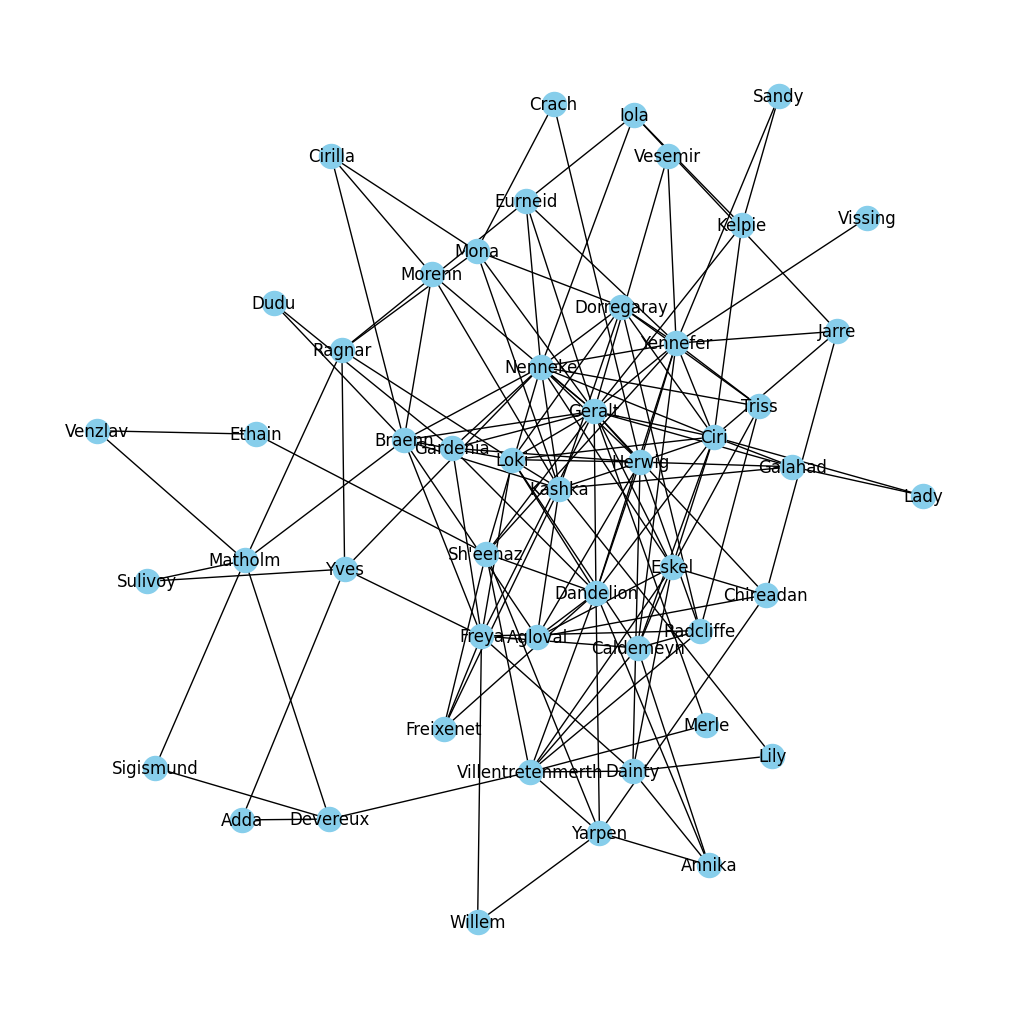

In [ ]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
!pip install pyvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

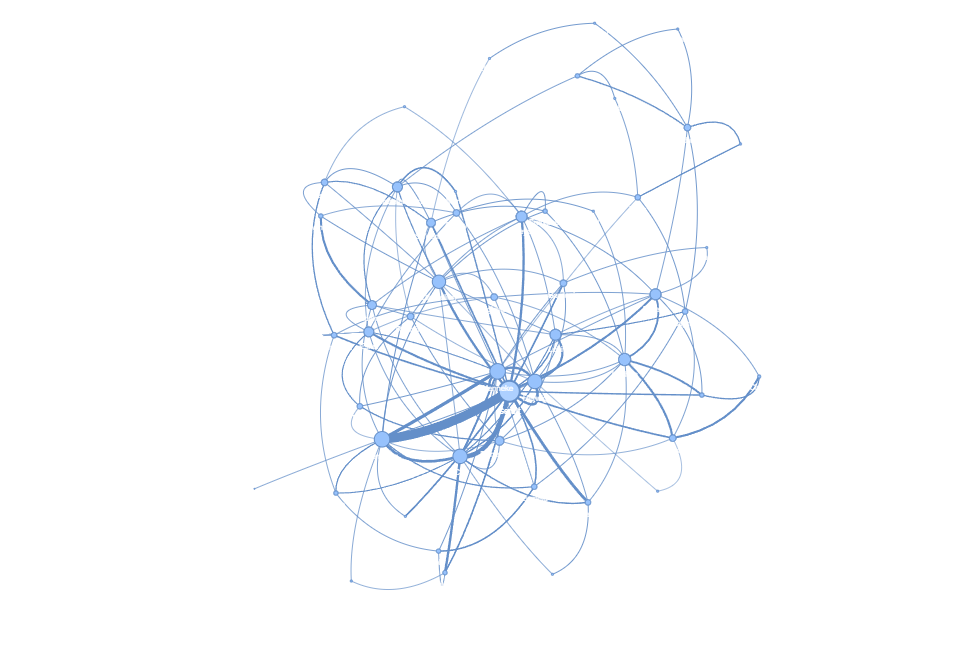

# Prikaz najbitnijih likova

<Axes: >

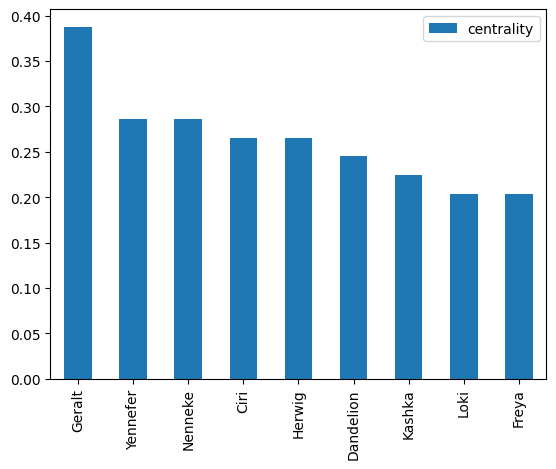

In [ ]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

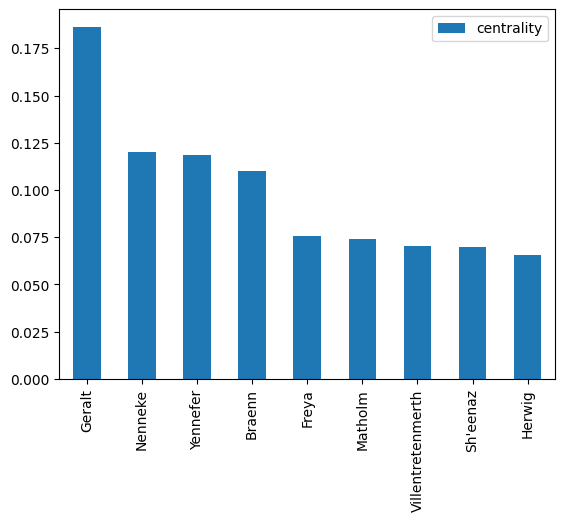

In [ ]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

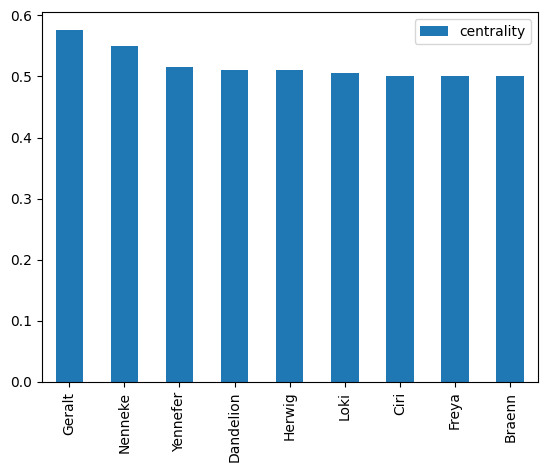

In [ ]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [ ]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [ ]:
# Calculate centrality measures
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Create dataframe
df = pd.DataFrame({'degree_centrality': degree_centrality,
                   'closeness_centrality': closeness_centrality,
                   'betweenness_centrality': betweenness_centrality,
                   'eigenvector_centrality': eigenvector_centrality})

print(df.head())

          degree_centrality  closeness_centrality  betweenness_centrality  \
Geralt             0.387755              0.576471                0.186310   
Yennefer           0.285714              0.515789                0.118257   
Ciri               0.265306              0.500000                0.065401   
Kelpie             0.081633              0.395161                0.008688   
Sandy              0.040816              0.350000                0.000661   

          eigenvector_centrality  
Geralt                  0.357547  
Yennefer                0.271868  
Ciri                    0.286231  
Kelpie                  0.083446  
Sandy                   0.039674  


In [ ]:
# Calculate PageRank for each node
page_rank = nx.pagerank(G)

# Convert the dictionary to a DataFrame and sort by descending PageRank value
df_page_rank = pd.DataFrame.from_dict(page_rank, orient="index", columns=["PageRank"])
df_page_rank = df_page_rank.sort_values("PageRank", ascending=False)

# Print the top 10 nodes by PageRank
print(df_page_rank.head(10))

           PageRank
Geralt     0.056230
Yennefer   0.044066
Nenneke    0.041191
Ciri       0.038365
Herwig     0.038058
Dandelion  0.035303
Kashka     0.033635
Braenn     0.032062
Freya      0.031442
Loki       0.029274


Nakon ovoga vidimo da je najvažniji lik Geralt što je bilo i očekivano.
No našom pretpostavkom Ciri nije uz Yennefer najbitniji lik nego Nenneke.

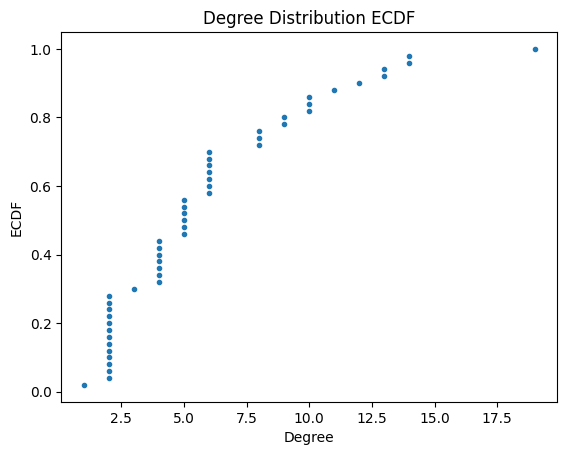

In [ ]:
# Get degree sequence
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Create ECDF
n = len(degree_sequence)
x = np.sort(degree_sequence)
y = np.arange(1, n+1) / n

# Plot ECDF
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Degree')
plt.ylabel('ECDF')
plt.title('Degree Distribution ECDF')
plt.show()

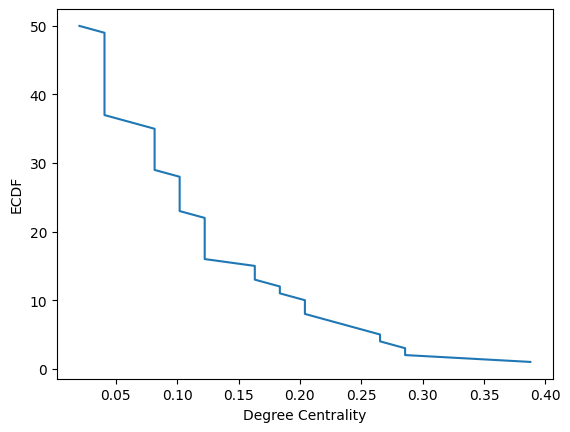

                 Node  Degree Centrality
0              Geralt           0.387755
1            Yennefer           0.285714
2             Nenneke           0.285714
3                Ciri           0.265306
4              Herwig           0.265306
5           Dandelion           0.244898
6              Kashka           0.224490
7               Freya           0.204082
8                Loki           0.204082
9              Braenn           0.204082
10              Eskel           0.183673
11  Villentretenmerth           0.183673
12         Dorregaray           0.163265
13          Caldemeyn           0.163265
14           Sh'eenaz           0.163265
15             Yarpen           0.122449
16           Gardenia           0.122449
17               Mona           0.122449
18            Matholm           0.122449
19          Radcliffe           0.122449
20            Agloval           0.122449
21             Dainty           0.122449
22              Triss           0.102041
23            Eu

In [ ]:
# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Sort the nodes by degree centrality in descending order
sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

# Create a DataFrame to store the sorted nodes and their degree centrality values
df = pd.DataFrame({"Node": sorted_nodes, "Degree Centrality": [degree_centrality[node] for node in sorted_nodes]})

# Plot the ECDF of degree centrality
n = len(sorted_nodes)
plt.plot(df["Degree Centrality"].values, range(1, n+1))
plt.xlabel("Degree Centrality")
plt.ylabel("ECDF")
plt.show()

# Print the sorted DataFrame
print(df)

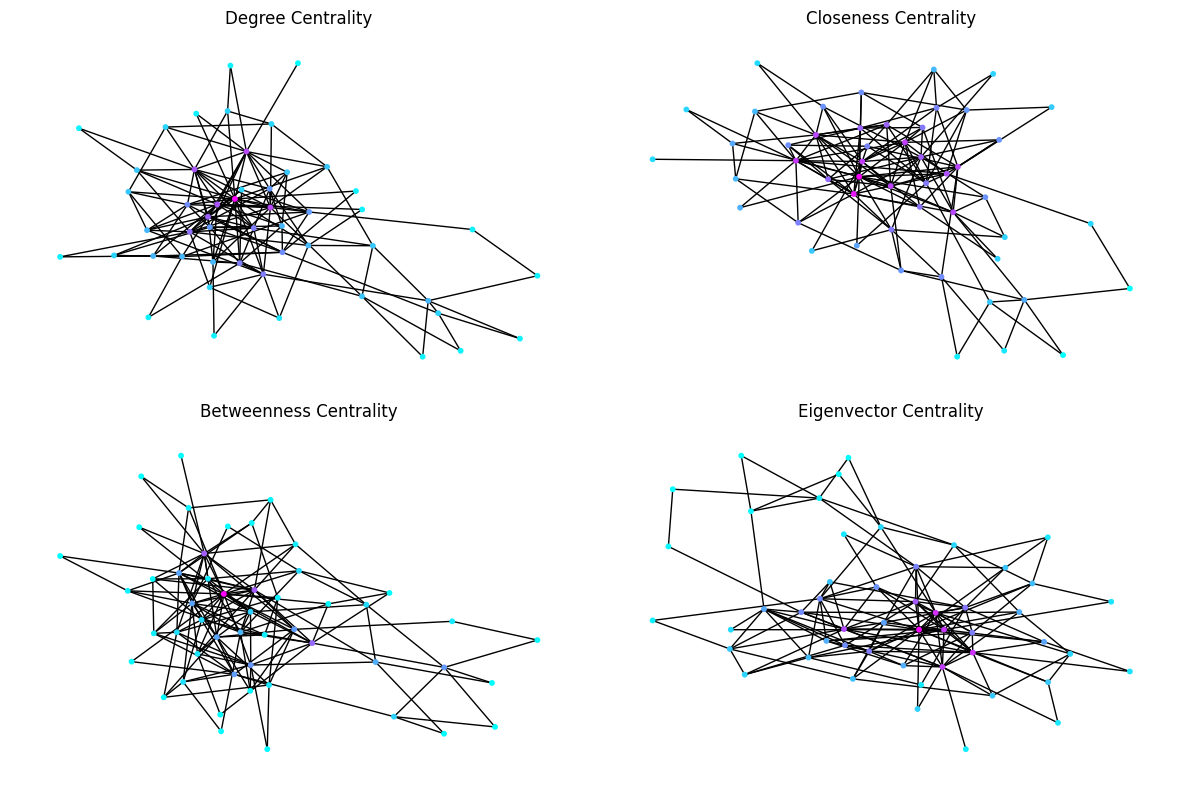

In [ ]:
# Draw the network with different node colors based on centrality measures
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()

nx.draw(G, ax=axs[0], with_labels=False, node_size=10, node_color=list(degree_centrality.values()), cmap='cool')
axs[0].set_title('Degree Centrality')

nx.draw(G, ax=axs[1], with_labels=False, node_size=10, node_color=list(closeness_centrality.values()), cmap='cool')
axs[1].set_title('Closeness Centrality')

nx.draw(G, ax=axs[2], with_labels=False, node_size=10, node_color=list(betweenness_centrality.values()), cmap='cool')
axs[2].set_title('Betweenness Centrality')

nx.draw(G, ax=axs[3], with_labels=False, node_size=10, node_color=list(eigenvector_centrality.values()), cmap='cool')
axs[3].set_title('Eigenvector Centrality')

plt.tight_layout()
plt.show()

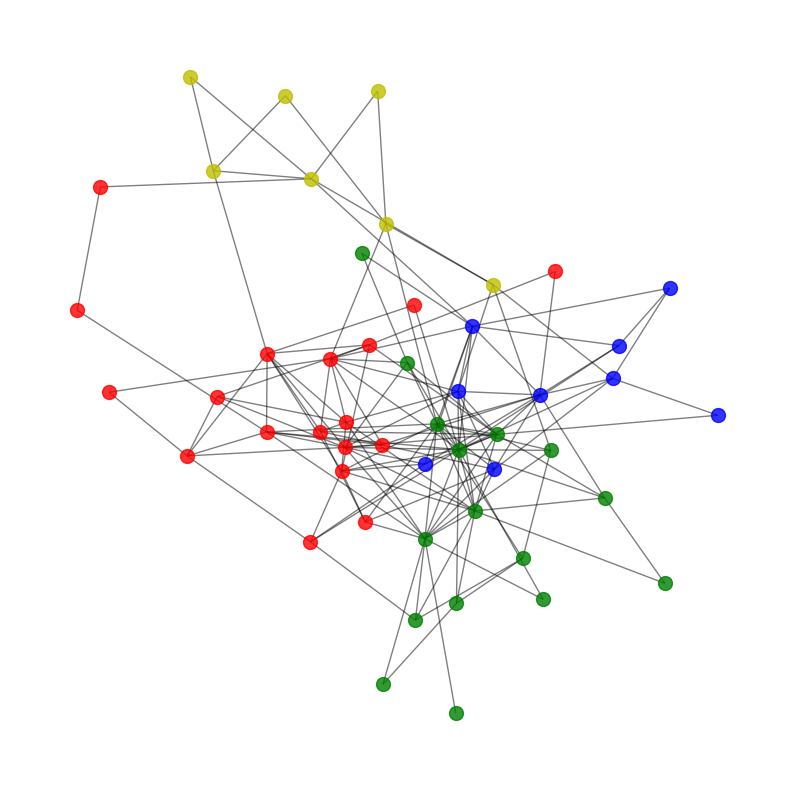

Modularity score: 0.3158866717715418


In [ ]:
from networkx.algorithms import community

# detect communities using Louvain Method
communities = community.greedy_modularity_communities(G)

# visualize network and communities
pos = nx.spring_layout(G)
color_list = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'orange', 'purple', 'pink', 'gray', 'brown', 'navy', 'lime']
if len(communities) > len(color_list):
    print(f"Number of communities: {len(communities)}")
    print(f"Number of colors: {len(color_list)}")
    raise ValueError("Not enough colors to label all communities")
plt.figure(figsize=(10, 10))
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(community),
                           node_color=color_list[i%len(color_list)],
                           node_size=100, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.axis('off')
plt.show()

# compute and print modularity score of communities
partition = [set(c) for c in communities]
print(f"Modularity score: {nx.community.modularity(G, partition)}")

Ovdje razlicite boje prikazuju gustocu veza medu likovima. Likovi sa rangom slicne gustoce su prikazani istom bojom.

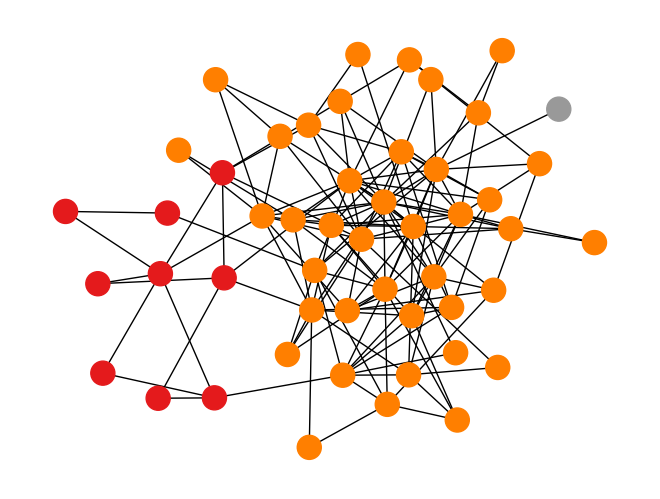

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from scipy.sparse.linalg import eigsh

# Compute the adjacency matrix and its Laplacian
A = nx.to_numpy_array(G)
D = np.diag(np.sum(A, axis=1))
L = D - A

# Compute the first three eigenvectors of the Laplacian
k = 3
vals, vecs = eigsh(L, k=k, which='SM')
X = vecs.real

# Cluster the nodes using Spectral Clustering algorithm
sc = SpectralClustering(n_clusters=k, n_init=20, assign_labels="discretize").fit(X)

# Visualize the network and clusters
pos = nx.kamada_kawai_layout(G)
colors = sc.labels_
nx.draw(G, pos, node_color=colors, cmap=plt.cm.Set1, with_labels=False)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


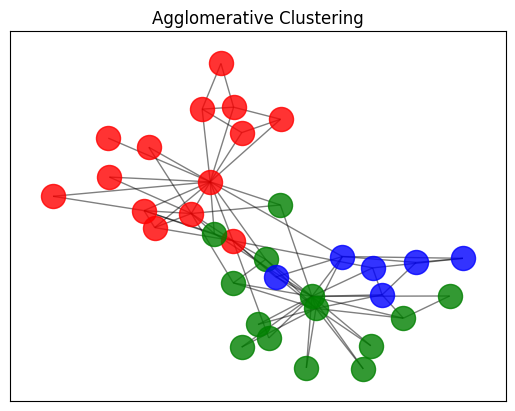

In [ ]:
import networkx as nx
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Create a graph from the relationships
G = nx.karate_club_graph()

# Convert node labels to integers starting from 0
G = nx.convert_node_labels_to_integers(G)

# Calculate shortest path lengths between nodes
dist_matrix = dict(nx.all_pairs_shortest_path_length(G))

# Perform agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', affinity='precomputed')
distance_matrix = [[dist_matrix[i][j] for j in range(len(G))] for i in range(len(G))]
cluster_labels = agg_clustering.fit_predict(distance_matrix)

# Draw the graph with nodes colored by cluster
pos = nx.spring_layout(G, seed=42)
colors = ['r', 'g', 'b']
for label, color in zip(set(cluster_labels), colors):
    node_list = [nodes for nodes in G.nodes() if cluster_labels[nodes] == label]
    nx.draw_networkx_nodes(G, pos, nodelist=node_list, node_color=color, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title("Agglomerative Clustering")
plt.show()



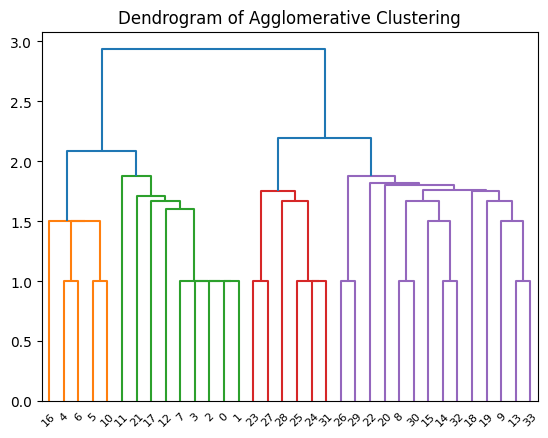

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

dist_matrix = dict(nx.all_pairs_shortest_path_length(G))

agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='average', metric='precomputed')
distance_matrix = [[dist_matrix[i][j] for j in range(len(dist_matrix))] for i in range(len(dist_matrix))]
distance_matrix_condensed = squareform(distance_matrix)
cluster_labels = agg_clustering.fit_predict(distance_matrix)

# compute linkage matrix and create dendrogram
Z = linkage(distance_matrix_condensed, method='average')
dendrogram(Z)
plt.title('Dendrogram of Agglomerative Clustering')
plt.show()

In [ ]:
import community as community_louvain

Number of communities: 2


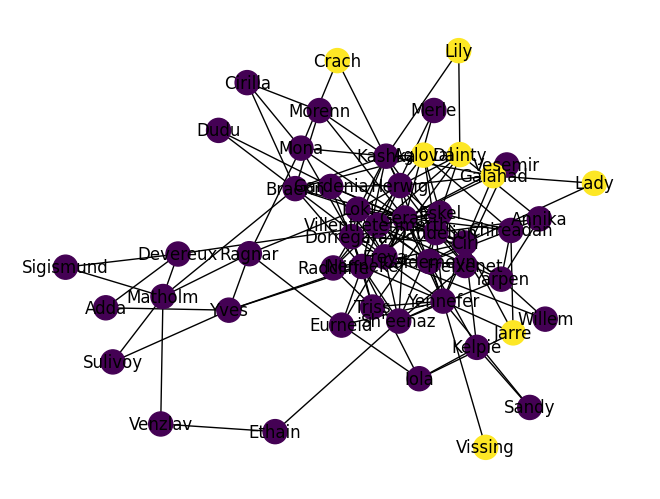

In [ ]:
from networkx.algorithms import community
import matplotlib.pyplot as plt

# Perform community detection using the Girvan-Newman algorithm
communities_generator = community.girvan_newman(G)
communities = next(communities_generator)

# Print the number of communities detected
print(f"Number of communities: {len(communities)}")

# Plot the network with nodes colored by community
pos = nx.spring_layout(G)
colors = [i for i in range(len(communities)) for _ in communities[i]]
nx.draw(G, pos, node_color=colors, with_labels=True)
plt.show()


In [ ]:
nx.set_node_attributes(G, communities, 'group')

# Zaključak

Nakraju u serijalu Witcher saznajemo da su najvažniji likovi, oko kojih se cijela radnja odvija, su: Geralt, Yennefer, Nenneke, Ciri.

Oni su imali najvise interakcija medusobono, sa drugim likovima, sporednim i viđenim samo jedanput.

Geralt je imao interakcije sa dosta drugih likova iako je prikazan kao lik kojem nije stalo do razgovora, dok ostali nesto manje i sa razlicitim likovima iako imaju vise dijaloga nego sam Geralt.

Nekada nije potrebno imati puno dijaloga da bi stvorio odnose medu likovima kao sto vidimo to i ovom slucaju.

S ovim vidimo da su redatelji serije pogodili glavne likove i dobro prikazali njihove odnose medusobno no izbacili ostale likove iz knjiga kao Nenneke koja je bila uciteljica Ciri i Geraltu te takoder njegovateljica nakon brojnih borbi.

Ona je u seriji bila ubacena kao sporedan lik koji je pomogao u jednoj epizodi Geraltu te u istoj epizodi ubivena dok je u knjizi prezivjela cijeli serijal te bila kljucna u treniranju Ciri.


# Hipoteza mladom autoru za pisanje svoje knjige


Imate par načina za napraviti uspješnu knjigu kao što je the Witcher.



1.   Istraživanje i upoznavanje:

      Zaronite duboko u postojeću priču i izgradnju svijeta serije "The Witcher", uključujući knjige, video igre i TV serije. Proučite likove, postavke, magične sustave, političku dinamiku i druge relevantne aspekte svemira. Pogledajte način na koji su likovi napisani i okarakterizirani



2.   Prepoznajte neispričane priče:

     Potražite praznine ili neispričane priče koje nisu opsežno istražene.Usredotočite se na jedinstvene likove, intrigantne zaplete ili neistražena područja koja bi mogla ponuditi nove perspektive i zaokupiti čitatelje.

    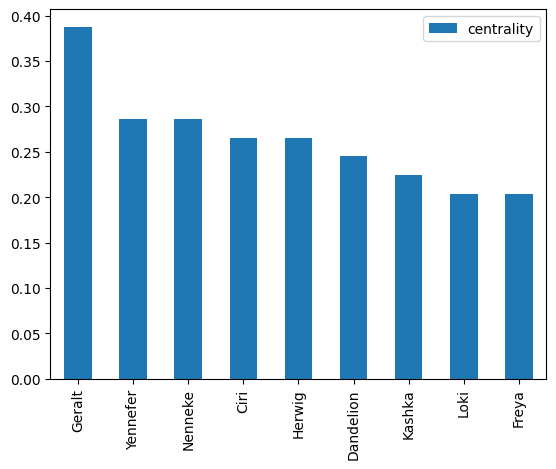

  Ako pogledamo stupanj centralnosti očito je da je Geralt glavni lik. On radi  najveću mrežu te povezuje ostale likove u priču. Dobar cilj je imati upečatljivog lika koji ne otkriva sve o sebi te je mračan ali i zanimljiv što paše u ovom serijalu
  

  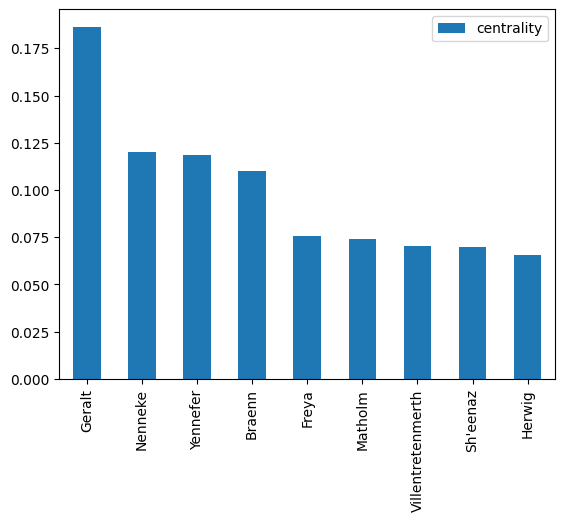

Međusobna centralnost nam govori o pojedinacima koji utječu na tijek oko sustava. U našem slučaju gledamo koji likovi vode priču. Osim očitog Geralta, ostali likovi kao što su Nenneke i Yennefer također dosta vode priču. Yennefer oko magije i svojih "sestara" ,a Nenneke oko treninga i pomoći Ciri. Ciri se ne spominje ovdje i nema rezultata jer sama po sebi nema nekih veza sa drugim likovima osim glavnih 4.To znači da ova 3 lika gore imaju najviše povezanosti sa drugim likovima te vode priču.

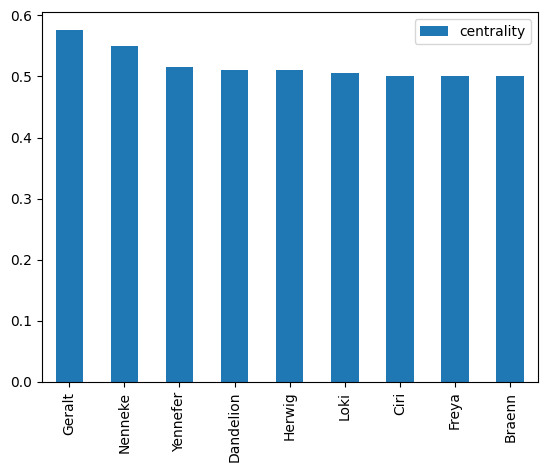

Blizina središnje se koristi za pronalaženje pojedinaca koji su u najboljoj poziciji da najbrže utječu na cijelu mrežu. U ovom slučaju vidimo koji likovi najbolje utječu na priču i likove. 


Zasada cijenjeni pišče znaš kako likove povezati, opisati i koliko moraju biti međusobno povezani.

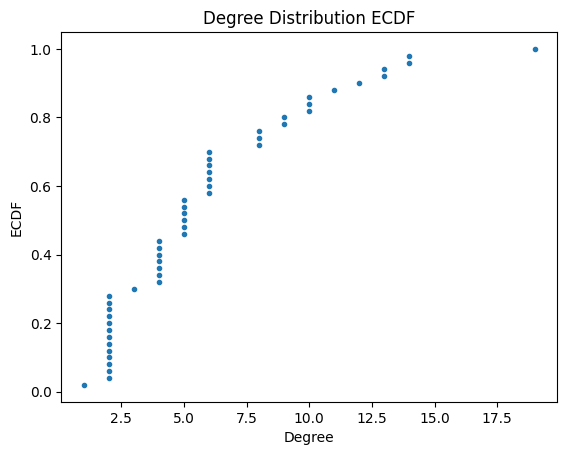

Analiziranje i razumijevanje  povezivanja u mrež je također bitno. Stupanj čvora u mreži odnosi se na broj veza koje ima s drugim čvorovima. Distribucija stupnjeva ECDF pruža uvid u distribuciju tih stupnjeva po čvorovima u mreži.

Ovdje se vidi koliko otprilike likova treba imati veze sa drugim te također imaj to na umu



3.   Razvijte originalne likove:

  Stvorite uvjerljive originalne likove koji mogu postojati unutar uspostavljenog svijeta poput "The Witcher", ali imaju svoje osebujne identitete, motivacije i sukobe.Razmotrite kako se ti likovi mogu presijecati s postojećim likovima i događajima u seriji, a da zadrže svoje individualne priče.




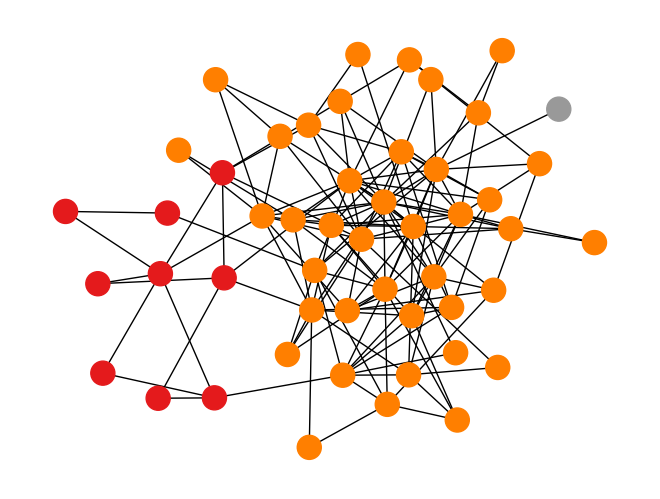

Na grafu Nodeovi iste boje oznacavaju ime koje je imalo interakciju sa drugim likom. Znaci svi narancasti likovi su imali interakciju međusobno nekad ako su povezani linijom. Također to vrijedi i za crvene ali oni su imali manje interakcije sa naracanstim. Time bi zakljucio da se prikazuju bitniji likovi ili likovi koji se pojavljuju tokom serijala knjiga a crveni su likovi koji se spominju 2 ili vise puta u tom serijalu.

  4. Izgradnja radnje:

  Osmislite dobro strukturiranu radnju koja zaokuplja čitatelje i održava bit "The Witcher" svemira. Uravnotežite akciju, avanturu, misteriju i razvoj likova kako biste zadržali čitatelje. Uplesti elemente magije, čudovišta, političke intrige i moralne složenosti karakteristične za ovu priču

  5. Dosljednost i autentičnost:

  Obratite pozornost na utvrđena pravila, izgradnju svijeta i predanje svemira "The Witcher" kako biste zadržali dosljednost u svojoj knjizi. Ostanite vjerni postojećim karakternim crtama i dinamici, dok dopuštate prostor za rast i evoluciju